### 用户行为数据

#### sessions.csv - web sessions log for users（网页浏览数据）

- 数据字典

user_id（用户id）: to be joined with the column ‘id’ in users table

action(用户行为)

action_type（用户行为类型）

action_detail（用户行为具体）

device_type（设备类型）

secs_elapsed（停留时长）

In [120]:
import pandas as pd
sessions = pd.read_csv('sessions.csv')
sessions.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [121]:
# 更改列名 user_id->id

sessions.head()

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [122]:
sessions.isnull().sum()

id                 34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

- id列有空值,需要处理

In [123]:
sessions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
id               object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [124]:
# 因为ID是数据的唯一标识,删除ID为空的行

sessions.head()

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [125]:
sessions.shape[0]

10533241

In [126]:
sessions.isnull().sum()

id                     0
action             79480
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed      135483
dtype: int64

In [127]:
# 缺失值处理
sessions.action = sessions.action.fillna('NAN')
sessions.action_type = sessions.action_type.fillna('NAN')
sessions.action_detail = sessions.action_detail.fillna('NAN')
sessions.isnull().sum()

id                    0
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     135483
dtype: int64

### 重尾分布和对数变换

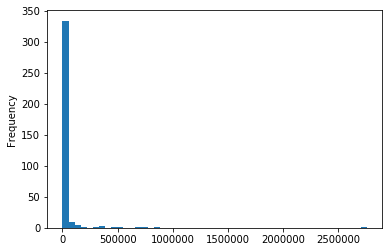

In [128]:
import matplotlib.pyplot as plt
import numpy as np
# 导入scipy包
from scipy import stats
# 查看用户行为的分布


- 行为次数的分布是个长尾分布,长尾分布的特点是均值和方差可能无限大

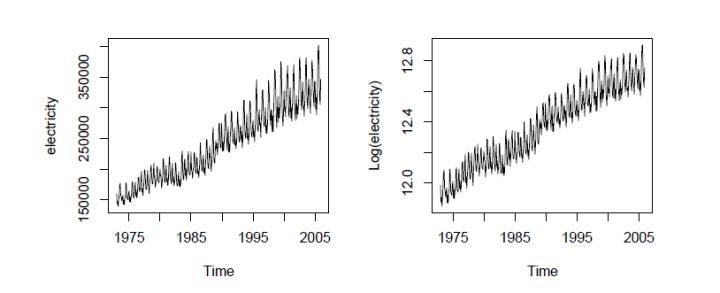

上图是每月电力生产数

左边是正常数据，可以看到随着时间推进，电力生产也变得方差越来越大，即越来越不稳定

这种情况下常有的分析假设(误差服从独立同分布的正态分布)经常就不会满足

必须让数据尽量满足假设，让方差恒定，即让波动相对稳定

而这种目的可以通过对数转换做到

#### 对数变换的特点
- 用数学语言来说,对数变换(log10)可以将[1,10]映射到[0,1],将[10,100]映射到[1,2].
- 用通俗的语言来说,对数变换可以对大数值的范围进行压缩,对小数值的范围进行扩展
- 用高逼格的语言来说,对数变换可以压缩分布高端的长尾,可以扩展分布低端的头部

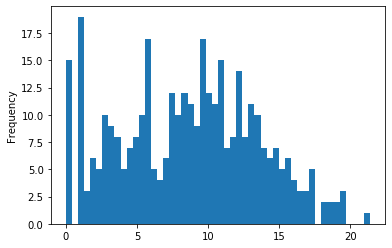

In [96]:
np.log2(sessions.action.value_counts()).plot(kind='hist',bins=50)
# 此处也可以取log10

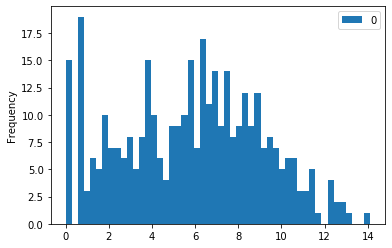

In [97]:
# Box-Cox变换可以明显地改善数据的正态性、对称性
pd.DataFrame(stats.boxcox(sessions.action.value_counts())[0]).plot(kind='hist',bins=50)

###  特征工程

In [99]:
sessions.action.value_counts()

show                           2758985
index                           841071
search_results                  723124
personalize                     704782
search                          533833
ajax_refresh_subtotal           486414
similar_listings                363423
update                          362708
social_connections              337764
reviews                         319318
active                          187370
similar_listings_v2             168457
lookup                          161422
create                          155233
dashboard                       152515
header_userpic                  141315
collections                     124067
edit                            108927
campaigns                       104647
track_page_view                  80949
NAN                              79480
unavailabilities                 77985
qt2                              64585
notifications                    59198
confirm_email                    58557
requested                

- 从上述结果可以看到不同的行为共有360种

In [100]:
# 第一步，计算各用户每个action的次数
pt_action_count = 
pt_action_count.head()

action,10,11,12,15,NAN,about_us,accept_decline,account,acculynk_bin_check_failed,acculynk_bin_check_success,...,view,views,views_campaign,views_campaign_rules,webcam_upload,weibo_signup_referral_finish,why_host,widget,wishlists,zendesk_login_jwt
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002qnbzfs5,9.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
pt_action_count.columns

Index(['10', '11', '12', '15', 'NAN', 'about_us', 'accept_decline', 'account',
       'acculynk_bin_check_failed', 'acculynk_bin_check_success',
       ...
       'view', 'views', 'views_campaign', 'views_campaign_rules',
       'webcam_upload', 'weibo_signup_referral_finish', 'why_host', 'widget',
       'wishlists', 'zendesk_login_jwt'],
      dtype='object', name='action', length=360)

- 透视表的列信息和上面验证的行为种类长度一致

In [102]:
# 第二步计算各用户所有action的均值和方差
pt_action_count['act_mean'] = 
pt_action_count['act_std'] = 
pt_action_count.head()

action,10,11,12,15,NAN,about_us,accept_decline,account,acculynk_bin_check_failed,acculynk_bin_check_success,...,views_campaign,views_campaign_rules,webcam_upload,weibo_signup_referral_finish,why_host,widget,wishlists,zendesk_login_jwt,act_mean,act_std
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.785714,2.241765
0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.636364,5.547690
001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.900000,19.107328
0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.513620
002qnbzfs5,9.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.307692,51.442850


In [103]:
# 第三步计算各个用户action_type的次数
pt_actiontype_count = 
pt_actiontype_count.head()

action_type,-unknown-,NAN,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
id,,,,,,,,,,,
00023iyk9l,NaN,3.0,1.0,NaN,4.0,9.0,1.0,NaN,0.0,NaN,21.0
0010k6l0om,5.0,15.0,NaN,NaN,16.0,9.0,NaN,NaN,0.0,NaN,17.0
001wyh0pz8,6.0,5.0,NaN,NaN,66.0,2.0,NaN,NaN,NaN,2.0,8.0
0028jgx1x1,1.0,NaN,NaN,NaN,9.0,5.0,NaN,NaN,NaN,0.0,15.0
002qnbzfs5,184.0,76.0,1.0,NaN,140.0,140.0,16.0,NaN,NaN,15.0,216.0


In [104]:
# 第四步计算各个用户action_type的均值和方差
pt_actiontype_ms = 
pt_actiontype_ms.head()

,mean,std
id,,
00023iyk9l,5.571429,7.435436
0010k6l0om,10.333333,6.860515
001wyh0pz8,14.833333,25.174723
0028jgx1x1,6.000000,6.164414
002qnbzfs5,98.500000,83.110941


In [105]:
# 连接两个表
pt_actiontype_count = 
pt_actiontype_count.head()

,-unknown-,NAN,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view,mean,std
id,,,,,,,,,,,,,
00023iyk9l,NaN,3.0,1.0,NaN,4.0,9.0,1.0,NaN,0.0,NaN,21.0,5.571429,7.435436
0010k6l0om,5.0,15.0,NaN,NaN,16.0,9.0,NaN,NaN,0.0,NaN,17.0,10.333333,6.860515
001wyh0pz8,6.0,5.0,NaN,NaN,66.0,2.0,NaN,NaN,NaN,2.0,8.0,14.833333,25.174723
0028jgx1x1,1.0,NaN,NaN,NaN,9.0,5.0,NaN,NaN,NaN,0.0,15.0,6.000000,6.164414
002qnbzfs5,184.0,76.0,1.0,NaN,140.0,140.0,16.0,NaN,NaN,15.0,216.0,98.500000,83.110941


In [106]:
# 第五步计算各个用户action_detail的次数
pt_actdetail_count = 
pt_actdetail_count.head()

action_detail,-unknown-,NAN,account_notification_settings,account_payment_methods,account_payout_preferences,account_privacy_settings,account_transaction_history,admin_templates,airbnb_picks_wishlists,alteration_field,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
0010k6l0om,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
001wyh0pz8,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028jgx1x1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002qnbzfs5,184.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# 第六步计算各个用户action_detail的均值方差
pt_actdetail_mean = 
pt_actdetail_mean.head()

,mean,std
id,,
00023iyk9l,2.785714,1.805060
0010k6l0om,6.888889,5.301991
001wyh0pz8,8.900000,20.151923
0028jgx1x1,5.000000,3.847077
002qnbzfs5,34.260870,48.037123


In [108]:
# 连接表
pt_actdetail_count = 
pt_actdetail_count.head()

,-unknown-,NAN,account_notification_settings,account_payment_methods,account_payout_preferences,account_privacy_settings,account_transaction_history,admin_templates,airbnb_picks_wishlists,alteration_field,...,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips,mean,std
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,2.785714,1.805060
0010k6l0om,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,6.888889,5.301991
001wyh0pz8,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.900000,20.151923
0028jgx1x1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.847077
002qnbzfs5,184.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.260870,48.037123


In [109]:
# 第七步计算各个用户设备类型登录的次数
pt_devtype_count = 
pt_devtype_count.head()

device_type,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
id,,,,,,,,,,,,,,
00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001wyh0pz8,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028jgx1x1,30.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002qnbzfs5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.0,NaN


In [110]:
# 第八步计算各个用户设备类型登录次数的均值方差
pt_devtype_ms = 
pt_devtype_ms.head()

,mean,std
id,,
00023iyk9l,20.0,22.627417
0010k6l0om,63.0,NaN
001wyh0pz8,90.0,NaN
0028jgx1x1,15.5,20.506097
002qnbzfs5,394.5,538.108260


In [111]:
# 表连接
pt_devtype_count = 
pt_devtype_count.head()

,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch,mean,std
id,,,,,,,,,,,,,,,,
00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,20.0,22.627417
0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
001wyh0pz8,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN
0028jgx1x1,30.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,20.506097
002qnbzfs5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.0,NaN,394.5,538.108260


In [112]:
# 第九步，按每个用户的均值填充secs_elapsed的空值
sessions['secs_elapsed'] = 
sessions.head()

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NAN,NAN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NAN,NAN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NAN,NAN,Windows Desktop,435.0


In [113]:
sessions.isnull().sum()

id                  0
action              0
action_type         0
action_detail       0
device_type         0
secs_elapsed     1426
dtype: int64

In [114]:
sessions[sessions.secs_elapsed.isnull()].head()

,id,action,action_type,action_detail,device_type,secs_elapsed
4291,psn48sflyc,NAN,message_post,message_post,iPhone,NaN
8659,k3jh9tfwei,NAN,message_post,message_post,iPhone,NaN
9440,nzssdzdz1u,create,-unknown-,-unknown-,-unknown-,NaN
16225,hl7s8263fd,NAN,message_post,message_post,iPhone,NaN
17194,vg18pknr6i,create,-unknown-,-unknown-,-unknown-,NaN


- 可以观察到有些用户只有一条数据,secs_elapsed同时也为空,填充空值会失效

In [115]:
# 二次填充,0值填充

sessions.isnull().sum()

id               0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

In [116]:
# 第十步,计算每个用户secs_elapsed的总和,均值和方差
pt_sec = 
pt_sec.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,sum,mean,std
,secs_elapsed,secs_elapsed,secs_elapsed
00023iyk9l,8.901497e+05,22253.743590,91052.285428
0010k6l0om,5.960034e+05,9460.370968,22567.004417
001wyh0pz8,2.861444e+05,3179.382022,6532.635785
0028jgx1x1,3.069103e+05,9900.333333,17702.338341
002qnbzfs5,6.495312e+06,8232.335025,58073.762227


In [117]:
# 去掉一层列索引
pt_sec = 
pt_sec.head()

,sum,mean,std
00023iyk9l,8.901497e+05,22253.743590,91052.285428
0010k6l0om,5.960034e+05,9460.370968,22567.004417
001wyh0pz8,2.861444e+05,3179.382022,6532.635785
0028jgx1x1,3.069103e+05,9900.333333,17702.338341
002qnbzfs5,6.495312e+06,8232.335025,58073.762227


In [ ]:
# 整合特征
feats = pd.concat([pt_action_count,pt_actiontype_count,pt_actdetail_count,,pt_devtype_count],axis=1)